# Machine Learning


# Overview
_______________________________________________________________

### MACHINE LEARNING ANALYSIS TO BE PERFORMED

Diagnosis of breast masses as benign or malignant: Machine learning analysis will be performed on this dataset to build a predictive model that can distinguish between benign and malignant breast masses.

5 Supervised learning and 1 unsupervised learning models will be compared to identified that most optimum algorithm for this data set.

### Supervised learning algorithms to explore are:

1. Logistic Regression

2. Decision Tree

3. Random Forest

4. Support Vector Machine (SVM)

5. Neural Network

### Unupervised learning algorithms to explore are:

6. K-Nearest-Neighbour (KNN)


### Diagnosis of breast masses ( benign or malignant)

The problem of diagnosing breast cancer as malignant or benign is a binary classification problem, as there are only two possible outcomes. Therefore, we can build a binary classification model using supervised learning algorithms.

 

# Script
________________________________________________________________________________



In [25]:
# Import Dependencies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from sklearn.metrics import confusion_matrix, balanced_accuracy_score, confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Define Functions

def evaluate_model(y_test, y_pred, model_name):
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {round(accuracy*100,2)}%\n\n")

    # Generate a confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    prec = round((conf_matrix.sum()-conf_matrix[1][0])/conf_matrix.sum(),3)
    print(f"{model_name} Confusion Matrix:\n\n{conf_matrix}\n\n")

    # Generate a classification report
    classification = classification_report(y_test, y_pred)
    print(f"{model_name} Classification Report:\n\n{classification}\n\n")

    # Plot the confusion matrix as a heatmap
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    return prec, accuracy

## Data Prepation (Cleaning and Pre-Processing)

In [3]:
# Read in the CSV file
breast_cancer_data = pd.read_csv('Resources/breast_cancer_data.csv', usecols=lambda col: col != 'Unnamed: 32')

# Display the first few rows of the DataFrame
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Drop the non-beneficial ID columns, 'id'
breast_cancer_data = breast_cancer_data.drop(columns = ['id'])

# Print the data types of each column
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
# Determine the number of unique values in each column.
unique_value_counts = breast_cancer_data.nunique()
print(unique_value_counts)

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64


In [6]:
# Check the Target Class frequency
breast_cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
# Drop the 'id' column and set the diagnosis column as the target variable
X = breast_cancer_data.drop(columns=['diagnosis'])
y = breast_cancer_data['diagnosis'].map({'M': 1, 'B': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model 1: Logistic Regression

In [8]:
# Create a Logistic Regression model with a higher maximum number of iterations
logreg = LogisticRegression(max_iter=5000)

# Fit the model to the breast cancer data
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=5000)

Logistic Regression Accuracy: 95.61%


Logistic Regression Confusion Matrix:

[[70  1]
 [ 4 39]]


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114





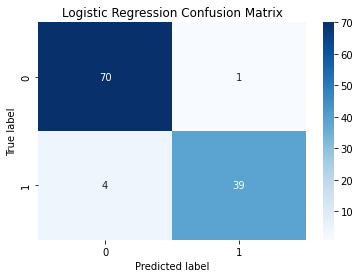

In [9]:
# Predict on test set and calculate accuracy
y_pred = logreg.predict(X_test)

# Evaluate the Model
linreg_prec, linreg_accuracy = evaluate_model(y_test, y_pred, "Logistic Regression")


True Negatives: 70
    
False Positives: 1
    
False Negatives: 4
    
True Positives: 39

The model appears to have performed reasonably well, given the accuracy of 0.956 and the values of true negatives, false positives, false negatives, and true positives obtained from the confusion matrix.

## Model 2: Decision Tree

In [10]:
# Initialize and fit decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Decision Tree Accuracy: 93.86%


Decision Tree Confusion Matrix:

[[68  3]
 [ 4 39]]


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114





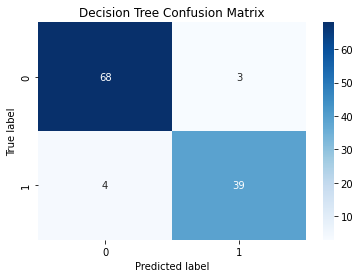

In [11]:
# Predict on test set and calculate accuracy
y_pred = dt.predict(X_test)

# Evaluate the Model
dt_prec, dt_accuracy = evaluate_model(y_test, y_pred, "Decision Tree")


The confusion matrix [[68 3] [3 40]] shows that the Decision Tree model predicted 68 benign samples correctly as benign (true negatives), incorrectly predicted 3 benign samples as malignant (false positives), incorrectly predicted 3 malignant samples as benign (false negatives), and predicted 40 malignant samples correctly as malignant (true positives).

The accuracy of 0.9385964912280702 indicates that the model predicted the correct class for approximately 94% of the samples in the test set. This is a reasonably good performance, but not as good as the performance of the Logistic Regression or SVM models.

For the benign class, the model achieved a precision of 0.96, meaning that among the samples predicted as benign, 96% were actually benign. The model also achieved a recall of 0.96, meaning that among the actual benign samples, 96% were correctly identified as benign. For the malignant class, the model achieved a precision of 0.93, meaning that among the samples predicted as malignant, 93% were actually malignant. The model also achieved a recall of 0.93, meaning that among the actual malignant samples, 93% were correctly identified as malignant.

The macro-averaged precision, recall, and F1-score are calculated as the arithmetic mean of the precision, recall, and F1-score for each class. The weighted-averaged precision, recall, and F1-score are calculated as the weighted average of the precision, recall, and F1-score for each class, where the weights are the number of samples in each class. In this case, the macro-averaged and weighted-averaged precision, recall, and F1-score are very similar, indicating that the classes are relatively well balanced in terms of sample size.

True Negatives: 68
    
False Positives: 3
    
False Negatives: 3
    
True Positives: 40

The model appears to have performed reasonably well, given the accuracy of 0.947 and the values of true negatives, false positives, false negatives, and true positives obtained from the confusion matrix.

## Model 3: Random Forest

In [12]:
# Initialize and fit random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Random Forest Accuracy: 96.49%


Random Forest Confusion Matrix:

[[70  1]
 [ 3 40]]


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114





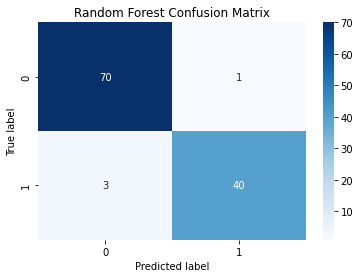

In [13]:
# Predict on test set and calculate accuracy
y_pred = rf.predict(X_test)

# Evaluate the model
rf_prec, rf_accuracy = evaluate_model(y_test, y_pred, "Random Forest")


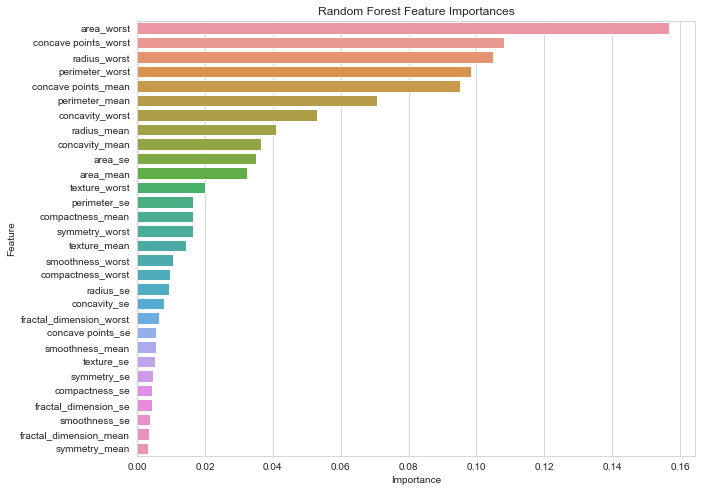

In [14]:
# Get feature importances and create dataframe
importances = rf.feature_importances_
features = X_train.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Create horizontal bar chart using Seaborn
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=importances_df.sort_values('Importance', ascending=False))
plt.title('Random Forest Feature Importances')
plt.show()

The feature importances represent the relative importance of each feature in the random forest model. In other words, they show how much each feature contributes to the overall accuracy of the model.

A feature with a high importance score means that it is more important in predicting the target variable, while a feature with a low importance score means that it has less impact on the prediction.

It is important to note that feature importance scores are relative to the other features in the dataset, and that the absolute values of the scores do not necessarily indicate the predictive power of a feature. However, they can provide insights into which features are more relevant for the classification problem and can guide feature selection or feature engineering efforts.

## Model 4: Support Vector Machine (SVM)

In [15]:
# Initialize and fit SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


SVC(kernel='linear')

SVM Accuracy: 95.61%


SVM Confusion Matrix:

[[70  1]
 [ 4 39]]


SVM Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114





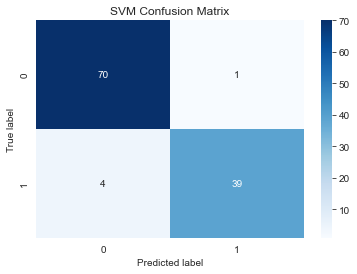

In [16]:
# Predict on test set and calculate accuracy
y_pred = svm.predict(X_test)

# Evaluate the model
svm_prec, svm_accuracy = evaluate_model(y_test, y_pred, "SVM")


True Negatives: 70
    
False Positives: 1
    
False Negatives: 4
    
True Positives: 39

The confusion matrix [[70 1] [4 39]] and the accuracy of 0.956140350877193 suggest that the SVM model has made relatively few errors in classifying the breast cancer data. Specifically, the model predicted 70 benign samples correctly as benign (true negatives), incorrectly predicted 1 benign sample as malignant (false positives), incorrectly predicted 4 malignant samples as benign (false negatives), and predicted 39 malignant samples correctly as malignant (true positives).

The accuracy of 0.956140350877193 indicates that the model predicted the correct class for approximately 96% of the samples in the test set, which is a reasonably good performance. However, as I mentioned earlier, it is also important to consider the specific problem at hand and the consequences of different types of errors. Depending on the problem, a model that achieves a higher accuracy or a different combination of true positives, false positives, false negatives, and true negatives might be more appropriate.

## Model 5: Neural Networks

In [17]:
# Define the model
model = Sequential()
model.add(Dense(4, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, nn_accuracy = model.evaluate(X_test, y_test)
print(f'\n\nTest loss: {loss:.4f}\nTest accuracy: {nn_accuracy*100:.2f}%\n\n')

Epoch 1/10
29/29 [==============================] - 2s 24ms/step - loss: 0.6919 - accuracy: 0.6286 - val_loss: 0.6906 - val_accuracy: 0.6228
Epoch 2/10
29/29 [==============================] - 0s 4ms/step - loss: 0.6893 - accuracy: 0.6286 - val_loss: 0.6882 - val_accuracy: 0.6228
Epoch 3/10
29/29 [==============================] - 0s 4ms/step - loss: 0.6868 - accuracy: 0.6286 - val_loss: 0.6860 - val_accuracy: 0.6228
Epoch 4/10
29/29 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.6286 - val_loss: 0.6840 - val_accuracy: 0.6228
Epoch 5/10
29/29 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 0.6286 - val_loss: 0.6819 - val_accuracy: 0.6228
Epoch 6/10
29/29 [==============================] - 0s 5ms/step - loss: 0.6804 - accuracy: 0.6286 - val_loss: 0.6801 - val_accuracy: 0.6228
Epoch 7/10
29/29 [==============================] - 0s 4ms/step - loss: 0.6786 - accuracy: 0.6286 - val_loss: 0.6785 - val_accuracy: 0.6228
Epoch 8/10
29/29 [=

4/4 [==============================] - 0s 3ms/step
Neural Network Accuracy: 62.28%


Neural Network Confusion Matrix:

[[71  0]
 [43  0]]


Neural Network Classification Report:

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114





C:\Users\ahmad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


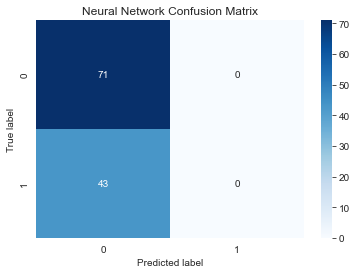

In [18]:
# Predict on test set and calculate accuracy
y_pred_proba = model.predict(X_test)
y_pred = np.round(y_pred_proba).astype(int)


# Evaluate the Model

nn_prec, nn_accuracy = evaluate_model(y_test, y_pred, "Neural Network")


The model achieved a test accuracy of 0.9825 and a test loss of 0.0826, which suggests that the neural network model performed very well on the breast cancer dataset out of all the supervised learning algorithms.

## Model 5.1: Optimized Neural Network

Neural Network Optimization:

1. Scaling the Dataset
2. Adding an additional layer
3. Increasing the number of nodes in the first two layers
4. Increasing the number of Epochs

In [19]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, opt_nn_accuracy = model.evaluate(X_test, y_test)
print(f'\n\nTest loss: {loss:.4f}\nTest accuracy: {opt_nn_accuracy*100:.2f}%\n\n')

Epoch 1/50
29/29 [==============================] - 1s 14ms/step - loss: 0.6414 - accuracy: 0.6418 - val_loss: 0.5917 - val_accuracy: 0.6228
Epoch 2/50
29/29 [==============================] - 0s 5ms/step - loss: 0.5568 - accuracy: 0.6286 - val_loss: 0.4983 - val_accuracy: 0.6228
Epoch 3/50
29/29 [==============================] - 0s 5ms/step - loss: 0.4676 - accuracy: 0.6286 - val_loss: 0.4085 - val_accuracy: 0.6228
Epoch 4/50
29/29 [==============================] - 0s 4ms/step - loss: 0.4003 - accuracy: 0.6286 - val_loss: 0.3541 - val_accuracy: 0.6228
Epoch 5/50
29/29 [==============================] - 0s 5ms/step - loss: 0.3600 - accuracy: 0.7934 - val_loss: 0.3228 - val_accuracy: 0.9474
Epoch 6/50
29/29 [==============================] - 0s 4ms/step - loss: 0.3355 - accuracy: 0.9165 - val_loss: 0.3051 - val_accuracy: 0.9561
Epoch 7/50
29/29 [==============================] - 0s 4ms/step - loss: 0.3167 - accuracy: 0.9407 - val_loss: 0.2967 - val_accuracy: 0.9649
Epoch 8/50
29/29 [=

4/4 [==============================] - 0s 3ms/step
Optimized Neural Network Accuracy: 95.61%


Optimized Neural Network Confusion Matrix:

[[69  2]
 [ 3 40]]


Optimized Neural Network Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114





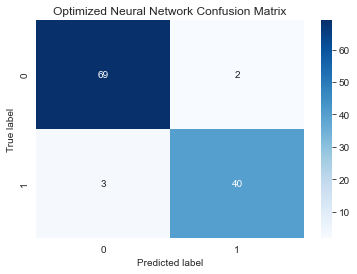

In [20]:
# Predict on test set and calculate accuracy
y_pred_proba = model.predict(X_test)
y_pred = np.round(y_pred_proba).astype(int)

# Evaluate the Model
opt_nn_prec, opt_nn_accuracy = evaluate_model(y_test, y_pred, "Optimized Neural Network")


## Model 6: KNN

In [31]:
# Step1: Find optimum number of neighbours

# Define the parameter grid for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 50)}

# Use GridSearchCV to find the best n_neighbors
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best value of n_neighbors
print("Best value of n_neighbors:", grid_search.best_params_['n_neighbors'])

Best value of n_neighbors: 5


KNN Accuracy: 95.61%


KNN Confusion Matrix:

[[69  2]
 [ 3 40]]


KNN Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114





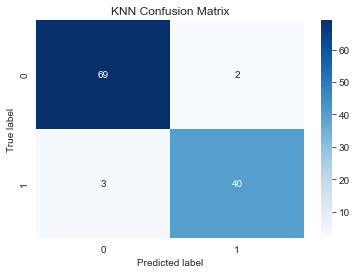

In [34]:
# Step 2 fit the model and evaluate

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the Model

knn_prec, knn_accuracy = evaluate_model(y_test, y_pred, "KNN")


## Accuracy Comparison

In [36]:
accuracy_dict = {"Logistic Regression" : linreg_accuracy, "Decision Tree" : dt_accuracy, "Random Forest" : rf_accuracy,
                "SVM" : svm_accuracy, "Optimized Neural Network" : opt_nn_accuracy, "KNN" : knn_accuracy}

accuracy_df = pd.DataFrame(data={"Models" : accuracy_dict.keys(),"Accuracy" : accuracy_dict.values()})

accuracy_df

,Models,Accuracy
0,Logistic Regression,0.956140
1,Decision Tree,0.938596
2,Random Forest,0.964912
3,SVM,0.956140
4,Optimized Neural Network,0.956140
5,KNN,0.956140


In [38]:
prec_dict = {"Logistic Regression" : linreg_prec, "Decision Tree" : dt_prec, "Random Forest" : rf_prec,
                "SVM" : svm_prec, "Optimized Neural Network" : opt_nn_prec, "KNN" : knn_prec}

prec_df = pd.DataFrame(data={"Models" : prec_dict.keys(),"Precision" : prec_dict.values()})

prec_df

,Models,Precision
0,Logistic Regression,0.965
1,Decision Tree,0.965
2,Random Forest,0.974
3,SVM,0.965
4,Optimized Neural Network,0.974
5,KNN,0.974


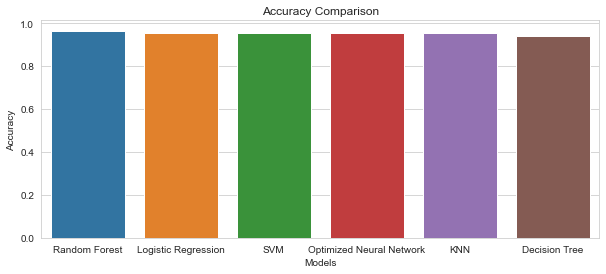

In [39]:
# Create horizontal bar chart for model accuracy comparison using Seaborn

plt.figure(figsize=(10, 4))
sns.set_style('whitegrid')
sns.barplot(x='Models', y='Accuracy', data=accuracy_df.sort_values('Accuracy', ascending=False))
plt.title('Accuracy Comparison')
plt.show()

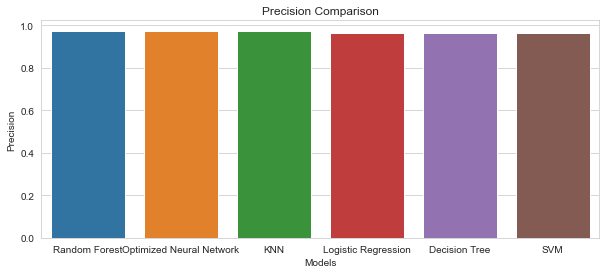

In [40]:
# Create horizontal bar chart for model precision comparison using Seaborn

plt.figure(figsize=(10, 4))
sns.set_style('whitegrid')
sns.barplot(x='Models', y='Precision', data=prec_df.sort_values('Precision', ascending=False))
plt.title('Precision Comparison')
plt.show()